<a href="https://colab.research.google.com/github/AntonioGarciaData/Valor_TI/blob/main/Supervised_models%20/Decission_Tree/Tarea_Parcial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<h1 align=center><font size = 5>Santander Customer Satisfaction
</font></h1>

---

## Tabla de Contenidos

<div class="alert alert-block alert-info" style="margin-top: 20px">

<font size = 3>
    
1. <a href="#item31">Introducción</a>  
2. <a href="#item32">Santander Problem</a>  
3. <a href="#item33">Descargar y limpiar el Dataset</a>  
4. <a href="#item34">SMOTE Algorithm</a>  
5. <a href="#item34">Decision Trees</a>  
7. <a href="#item34">Cross Validation y GridSearch</a>  
6. <a href="#item34">Random Forest</a>  
8. <a href="#item34">AdaBoost</a>  
9. <a href="#item34">XGBoost</a>
10. <a href="#item34">RandomSearch</a>
11. <a href="#item34">¿Cómo implementar un modelo?</a>  

</font>
</div>

## Introducción


En este laboratorio, aprenderá a usar python para construir modelos de ensemble.


<h3>Objetivo de este Notebook<h3>    
<h5> 1. Como construir e interpretar un modelo de ensemble.</h5>
<h5> 2. Descargar y limpiar un Dataset </h5>
<h5> 3. Realizar los pasos necesarios previos a la etapa de modelamiento </h5>
<h5> 4. Entrenar y Testear modelo </h5>     

Primero, importemos algunos módulos que necesitaremos para el análisis y construcción del modelo.

In [13]:

# Scikit-Learn
import sklearn
assert sklearn.__version__ >= "0.20"

# Imports comunes
import pandas as pd
import numpy as np
import os

# Configuración de tamaño de gráficos matplotlib
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Ignore las advertencias poco útiles
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

## Santander Customer Satisfaction


Desde los equipos de soporte de primera línea hasta los ejecutivos, la satisfacción del cliente es una medida clave del éxito de una empresa. Los clientes insatisfechos no se quedan. Es más, los clientes insatisfechos rara vez expresan su insatisfacción antes de irse.

El banco Santander está pidiendo a la comunidad data scientist que los ayude a identificar clientes insatisfechos desde su primera interacción. Hacerlo permitiría a Santander tomar medidas proactivas para mejorar la felicidad de un cliente antes de que sea demasiado tarde.

<img src="https://storage.googleapis.com/kaggle-media/competitions/kaggle/4986/media/santander_custsat_red.png" alt="HTML5 Icon" style="width: 600px; height: 450px;">
<div style="text-align: center">¿Qué clientes son clientes satisfechos? </div>


<b>Descripción de datos</b>

El data frame de Santander tiene 76,020 filas y 371 columnas.


---

Se le proporciona un conjunto de datos anónimos que contiene una gran cantidad de variables numéricas. La columna <b>"OBJETIVO"</b> es la variable a predecir. Es igual a uno para clientes insatisfechos y 0 para clientes satisfechos.

La tarea consiste en predecir la probabilidad de que cada cliente del conjunto de prueba sea un cliente insatisfecho.


## Descargar y limpiar Dataset


In [14]:
# Cargar Data
import pandas as pd
pddf = pd.read_csv("santander.csv")
pddf.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [15]:
pddf.shape

(76020, 371)

In [16]:
# Cargar seaborn
import seaborn as sns
sns.set(style="whitegrid", color_codes = True)
sns.set(rc={'figure.figsize':(10,6)})

<Axes: xlabel='TARGET', ylabel='count'>

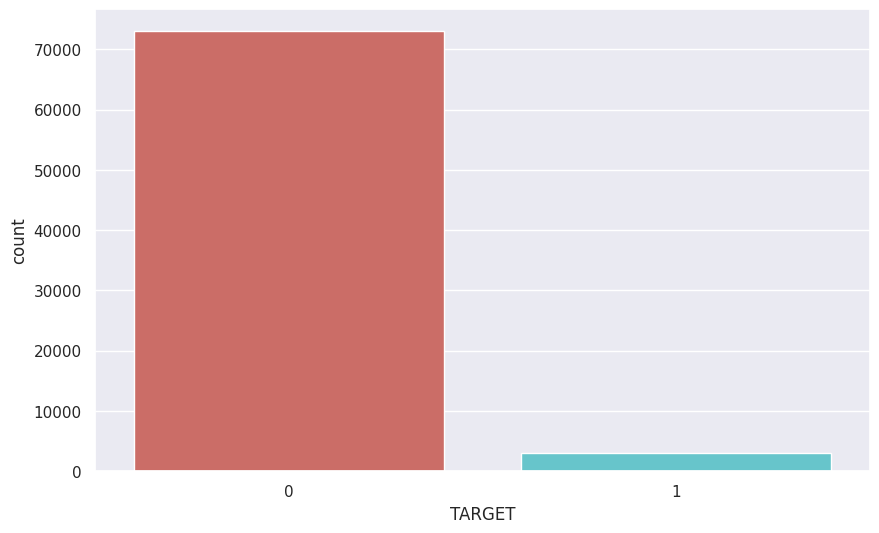

In [17]:
# Analizando el target
sns.countplot(x = 'TARGET', data = pddf, palette = 'hls')


In [18]:
pddf.groupby('TARGET')['ID'].count()

TARGET
0    73012
1     3008
Name: ID, dtype: int64

In [19]:
pddf[['TARGET']].describe()

,TARGET
count,76020.000000
mean,0.039569
std,0.194945
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [20]:
# Indentificar las variables

features = list(set(pddf.columns.tolist()) - set(['ID','TARGET']))
features

['num_var28',
 'ind_var32_cte',
 'num_var13_corto_0',
 'num_op_var41_hace3',
 'num_var22_hace3',
 'delta_imp_aport_var17_1y3',
 'var21',
 'imp_op_var40_comer_ult3',
 'ind_var26_cte',
 'imp_trasp_var33_in_hace3',
 'num_op_var40_efect_ult1',
 'num_var13_medio_0',
 'ind_var27',
 'saldo_var2_ult1',
 'saldo_medio_var5_ult3',
 'num_compra_var44_ult1',
 'saldo_medio_var33_hace3',
 'saldo_var13',
 'num_var24',
 'imp_amort_var34_ult1',
 'delta_imp_reemb_var13_1y3',
 'var38',
 'imp_op_var39_comer_ult3',
 'num_op_var40_ult3',
 'saldo_medio_var8_ult3',
 'delta_imp_amort_var18_1y3',
 'imp_aport_var17_ult1',
 'saldo_var30',
 'num_var42',
 'ind_var43_emit_ult1',
 'num_var41',
 'num_meses_var39_vig_ult3',
 'saldo_var25',
 'num_var7_emit_ult1',
 'ind_var33_0',
 'imp_trasp_var17_in_ult1',
 'saldo_medio_var44_ult1',
 'imp_reemb_var33_ult1',
 'ind_var44',
 'saldo_var41',
 'imp_trasp_var33_out_hace3',
 'imp_amort_var18_ult1',
 'imp_var7_emit_ult1',
 'delta_imp_compra_var44_1y3',
 'saldo_medio_var33_hace2',

In [21]:
# Determinando matrices de datos

X = pddf[features]
y = pddf.TARGET


In [22]:
# Muestreo de data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    stratify = y,
                                                    test_size = 0.3,
                                                    random_state = 123)


In [23]:
y_train.mean()

0.039576051415041155

In [24]:
y_test.mean()

0.03955099535210033

# SMOTE Algorithm


<b>Synthetic Minority Oversampling Technique</b>

Es uno de los métodos de sobremuestreo más utilizados para resolver el problema del desbalanceo.
Su objetivo es equilibrar la distribución de clases aumentando aleatoriamente los ejemplos de clases minoritarias al replicarlos.


SMOTE sintetiza nuevas instancias minoritarias entre instancias minoritarias existentes. Genera los registros de entrenamiento virtual por interpolación lineal para la clase minoritaria. Estos registros de entrenamiento sintéticos se generan seleccionando aleatoriamente uno o más de los k vecinos más cercanos para cada ejemplo en la clase minoritaria. Después del proceso de sobremuestreo, los datos se reconstruyen y se pueden aplicar varios modelos de clasificación para los datos procesados.



In [25]:
# Aplicando SMOTE para oversampling

from imblearn.over_sampling import SMOTE


In [26]:
sm = SMOTE(random_state = 123)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())


<Axes: ylabel='count'>

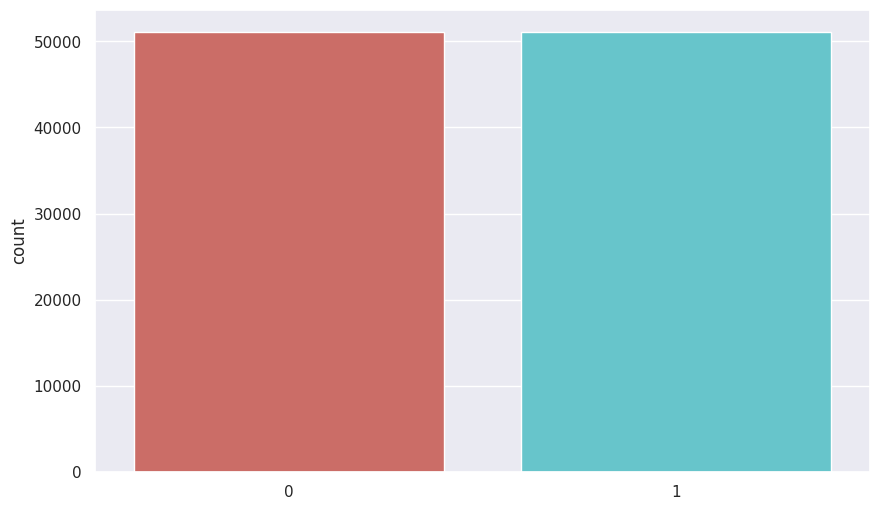

In [27]:
# Analizando el target
sns.countplot(x = y_train_res, palette = 'hls')

# Decision Tree

In [28]:
# Cargar librerías

from sklearn.tree import DecisionTreeClassifier


In [29]:
# Definiendo modelo


dtree = DecisionTreeClassifier(max_depth = 5,
                               #class_weight = {0: 1, 1: 25.272},
                               min_samples_leaf = 0.05,
                               random_state = 123)

dtree = dtree.fit(X_train_res, y_train_res)

dtree

DecisionTreeClassifier(max_depth=5, min_samples_leaf=0.05, random_state=123)

In [30]:
# Graficando resultados

from sklearn.tree import export_graphviz
from pydotplus import graph_from_dot_data

dot_data = export_graphviz(dtree,
                           feature_names = features,
                           filled = True,
                           rounded = True,
                           special_characters = True)

graph = graph_from_dot_data(dot_data)
graph.write_png('tree.png')
print(graph)


<b>Bondad de ajuste</b>

In [31]:
# Usando el modelo para predecir

X_train['probability'] = dtree.predict_proba(X_train[features])[:,1]
X_test['probability']  = dtree.predict_proba(X_test[features])[:,1]

X_train['prediction'] = dtree.predict(X_train[features])
X_test['prediction']  = dtree.predict(X_test[features])

In [32]:
#Resumen de todas las métricas del modelo
from sklearn.metrics import *

metricsDtree_smote = pd.DataFrame({'metric':['AUC','Gini','Accuracy','Precision','Recall','F1-score'],
                                'dTree_smote_train':[roc_auc_score(y_train, X_train.probability),
                                        (roc_auc_score(y_train, X_train.probability)*2-1),
                                        accuracy_score(y_train, X_train.prediction),
                                        precision_score(y_train, X_train.prediction),
                                        recall_score(y_train, X_train.prediction),
                                        f1_score(y_train, X_train.prediction)],

                                'dTree_smote_test':[roc_auc_score(y_test, X_test.probability),
                                        (roc_auc_score(y_test, X_test.probability)*2-1),
                                        accuracy_score(y_test, X_test.prediction),
                                        precision_score(y_test, X_test.prediction),
                                        recall_score(y_test, X_test.prediction),
                                        f1_score(y_test, X_test.prediction)]})

metricsDtree_smote

,metric,dTree_smote_train,dTree_smote_test
0,AUC,0.800894,0.799110
1,Gini,0.601789,0.598221
2,Accuracy,0.783309,0.788389
3,Precision,0.112491,0.115143
4,Recall,0.649573,0.650776
5,F1-score,0.191771,0.195667


### balanceo por pesos

In [33]:
# Muestreo de data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    stratify = y,
                                                    test_size = 0.3,
                                                    random_state = 123)


In [34]:
y_train.shape[0] - y_train.sum()

51108

In [35]:
y_train.sum()

2106

In [36]:
(y_train.shape[0] - y_train.sum())/y_train.sum()

24.267806267806268

In [37]:
# Definiendo modelo


dtree = DecisionTreeClassifier(max_depth = 5,
                               class_weight = {0: 1, 1: 24.267},
                               min_samples_leaf = 0.05,
                               random_state = 123)

dtree = dtree.fit(X_train, y_train)

dtree

DecisionTreeClassifier(class_weight={0: 1, 1: 24.267}, max_depth=5,
                       min_samples_leaf=0.05, random_state=123)

In [38]:
# Usando el modelo para predecir

X_train['probability'] = dtree.predict_proba(X_train[features])[:,1]
X_test['probability']  = dtree.predict_proba(X_test[features])[:,1]

X_train['prediction'] = dtree.predict(X_train[features])
X_test['prediction']  = dtree.predict(X_test[features])

In [39]:
#Resumen de todas las métricas del modelo
from sklearn.metrics import *

metricsDtree_w = pd.DataFrame({'metric':['AUC','Gini','Accuracy','Precision','Recall','F1-score'],
                                'dTree_w_train':[roc_auc_score(y_train, X_train.probability),
                                        (roc_auc_score(y_train, X_train.probability)*2-1),
                                        accuracy_score(y_train, X_train.prediction),
                                        precision_score(y_train, X_train.prediction),
                                        recall_score(y_train, X_train.prediction),
                                        f1_score(y_train, X_train.prediction)],

                                'dTree_w_test':[roc_auc_score(y_test, X_test.probability),
                                        (roc_auc_score(y_test, X_test.probability)*2-1),
                                        accuracy_score(y_test, X_test.prediction),
                                        precision_score(y_test, X_test.prediction),
                                        recall_score(y_test, X_test.prediction),
                                        f1_score(y_test, X_test.prediction)]})

metricsDtree_w

,metric,dTree_w_train,dTree_w_test
0,AUC,0.820066,0.803175
1,Gini,0.640132,0.606351
2,Accuracy,0.704645,0.707402
3,Precision,0.099323,0.095472
4,Recall,0.801045,0.754989
5,F1-score,0.176732,0.169508


In [40]:
# Definiendo modelo

dtree_unb = DecisionTreeClassifier(max_depth = 5,
                               min_samples_leaf = 0.05,
                               random_state = 123)

dtree_unb = dtree_unb.fit(X_train[features], y_train)

# Usando el modelo para predecir

X_train['probability_unb'] = dtree_unb.predict_proba(X_train[features])[:,1]
X_test['probability_unb']  = dtree_unb.predict_proba(X_test[features])[:,1]

X_train['prediction_unb'] = dtree_unb.predict(X_train[features])
X_test['prediction_unb']  = dtree_unb.predict(X_test[features])

#Resumen de todas las métricas del modelo
metricsDtree_unb = pd.DataFrame({'metric':['AUC','Gini','Accuracy','Precision','Recall','F1-score'],
                                'dTree_unb_train':[roc_auc_score(y_train, X_train.probability_unb),
                                        (roc_auc_score(y_train, X_train.probability_unb)*2-1),
                                        accuracy_score(y_train, X_train.prediction_unb),
                                        precision_score(y_train, X_train.prediction_unb),
                                        recall_score(y_train, X_train.prediction_unb),
                                        f1_score(y_train, X_train.prediction_unb)],

                                'dTree_unb_test':[roc_auc_score(y_test, X_test.probability_unb),
                                        (roc_auc_score(y_test, X_test.probability_unb)*2-1),
                                        accuracy_score(y_test, X_test.prediction_unb),
                                        precision_score(y_test, X_test.prediction_unb),
                                        recall_score(y_test, X_test.prediction_unb),
                                        f1_score(y_test, X_test.prediction_unb)]})
metricsDtree_unb

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,metric,dTree_unb_train,dTree_unb_test
0,AUC,0.823127,0.805164
1,Gini,0.646253,0.610328
2,Accuracy,0.960424,0.960449
3,Precision,0.000000,0.000000
4,Recall,0.000000,0.000000
5,F1-score,0.000000,0.000000


In [41]:
temp = pd.merge(metricsDtree_smote, metricsDtree_w, on = ['metric'], how= 'left')
pd.merge(temp, metricsDtree_unb, on = ['metric'], how= 'left')



,metric,dTree_smote_train,dTree_smote_test,dTree_w_train,dTree_w_test,dTree_unb_train,dTree_unb_test
0,AUC,0.800894,0.799110,0.820066,0.803175,0.823127,0.805164
1,Gini,0.601789,0.598221,0.640132,0.606351,0.646253,0.610328
2,Accuracy,0.783309,0.788389,0.704645,0.707402,0.960424,0.960449
3,Precision,0.112491,0.115143,0.099323,0.095472,0.000000,0.000000
4,Recall,0.649573,0.650776,0.801045,0.754989,0.000000,0.000000
5,F1-score,0.191771,0.195667,0.176732,0.169508,0.000000,0.000000


In [ ]:
X_train['TARGET'] = y_train

In [ ]:
X_train.loc[X_train.probability < 0.04].TARGET.mean()

0.0007365126127784938

# Cross Validation

In [47]:
# Cargar librerías para grid search

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import *


In [48]:
list(range(2,13))

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

In [49]:
# Definiendo GRID de los parámetros a probar

parameters = {'max_depth': list(range(2,13)),
              'min_samples_leaf' : [0.01, 0.025, 0.05, 0.1, 0.2]}


In [50]:
# Definiendo modelo

dtree = DecisionTreeClassifier(random_state = 123)


In [51]:
# Ejecutando grid search con 5 folds

GridSearch = GridSearchCV(dtree, parameters, cv = 5, verbose = 5, n_jobs = 5,
                          refit = 'AUC',
                          return_train_score = True)

GridSearch.fit(X_train_res, y_train_res.ravel())
#elapsed:  4.6min finished


Fitting 5 folds for each of 55 candidates, totalling 275 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=123), n_jobs=5,
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
                         'min_samples_leaf': [0.01, 0.025, 0.05, 0.1, 0.2]},
             refit='AUC', return_train_score=True, verbose=5)

In [52]:
GridSearch.best_params_

{'max_depth': 8, 'min_samples_leaf': 0.01}

In [53]:
def plot_search_results(grid):
    """
    Params:
        grid: A trained GridSearchCV object.
    """
    ## Results from grid search
    results = grid.cv_results_
    means_test = results['mean_test_score']
    stds_test = results['std_test_score']
    means_train = results['mean_train_score']
    stds_train = results['std_train_score']

    ## Getting indexes of values per hyper-parameter
    masks=[]
    masks_names= list(grid.best_params_.keys())
    for p_k, p_v in grid.best_params_.items():
        masks.append(list(results['param_'+p_k].data==p_v))

    params=grid.param_grid

    ## Ploting results
    fig, ax = plt.subplots(1,len(params),sharex='none', sharey='all',figsize=(20,5))
    fig.suptitle('Score per parameter')
    fig.text(0.04, 0.5, 'MEAN SCORE', va='center', rotation='vertical')
    pram_preformace_in_best = {}
    for i, p in enumerate(masks_names):
        m = np.stack(masks[:i] + masks[i+1:])
        pram_preformace_in_best
        best_parms_mask = m.all(axis=0)
        best_index = np.where(best_parms_mask)[0]
        x = np.array(params[p])
        y_1 = np.array(means_test[best_index])
        e_1 = np.array(stds_test[best_index])
        y_2 = np.array(means_train[best_index])
        e_2 = np.array(stds_train[best_index])
        ax[i].errorbar(x, y_1, e_1, linestyle='--', marker='o', label='test')
        ax[i].errorbar(x, y_2, e_2, linestyle='-', marker='^',label='train' )
        ax[i].set_xlabel(p.upper())

    plt.legend()
    plt.show()

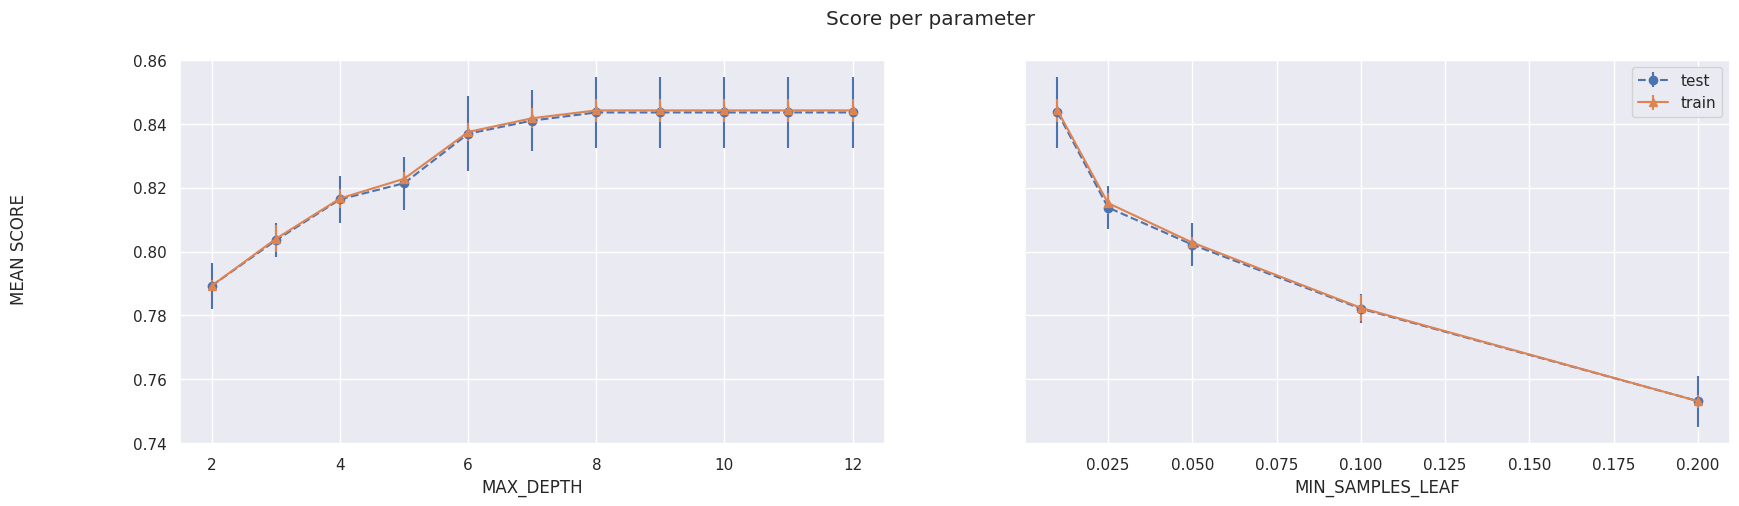

In [54]:

# Calling Method
plot_search_results(GridSearch)


In [55]:
# Entrenamiento Óptimizado

dtree = DecisionTreeClassifier(max_depth = 6,
                               min_samples_leaf = 0.01,
                               random_state = 123)

dtree = dtree.fit(X_train_res, y_train_res)

dtree

DecisionTreeClassifier(max_depth=6, min_samples_leaf=0.01, random_state=123)

In [56]:
# Graficando resultados

from sklearn.tree import export_graphviz
from pydotplus import graph_from_dot_data

dot_data = export_graphviz(dtree,
                           feature_names = features,
                           filled = True,
                           rounded = True,
                           special_characters = True)

graph = graph_from_dot_data(dot_data)
graph.write_png('tree.png')
print(graph)

<b>Bondad de ajuste</b>

In [57]:
# Usando el modelo para predecir

X_train['probability'] = dtree.predict_proba(X_train[features])[:,1]
X_test['probability']  = dtree.predict_proba(X_test[features])[:,1]

X_train['prediction'] = dtree.predict(X_train[features])
X_test['prediction']  = dtree.predict(X_test[features])


In [58]:
#Resumen de todas las métricas del modelo

metricsDtreeOpt = pd.DataFrame({'metric':['AUC','Gini','Accuracy','Precision','Recall','F1-score'],
                                'dTree_train':[roc_auc_score(y_train, X_train.probability),
                                        (roc_auc_score(y_train, X_train.probability)*2-1),
                                        accuracy_score(y_train, X_train.prediction),
                                        precision_score(y_train, X_train.prediction),
                                        recall_score(y_train, X_train.prediction),
                                        f1_score(y_train, X_train.prediction)],

                                'dTree_test':[roc_auc_score(y_test, X_test.probability),
                                        (roc_auc_score(y_test, X_test.probability)*2-1),
                                        accuracy_score(y_test, X_test.prediction),
                                        precision_score(y_test, X_test.prediction),
                                        recall_score(y_test, X_test.prediction),
                                        f1_score(y_test, X_test.prediction)]})

metricsDtreeOpt

,metric,dTree_train,dTree_test
0,AUC,0.808261,0.798188
1,Gini,0.616523,0.596376
2,Accuracy,0.819127,0.818776
3,Precision,0.133041,0.129727
4,Recall,0.647198,0.627494
5,F1-score,0.220711,0.215005


In [59]:
pd.merge(metricsDtree_smote, metricsDtreeOpt, on = 'metric', how='left')

,metric,dTree_smote_train,dTree_smote_test,dTree_train,dTree_test
0,AUC,0.800894,0.799110,0.808261,0.798188
1,Gini,0.601789,0.598221,0.616523,0.596376
2,Accuracy,0.783309,0.788389,0.819127,0.818776
3,Precision,0.112491,0.115143,0.133041,0.129727
4,Recall,0.649573,0.650776,0.647198,0.627494
5,F1-score,0.191771,0.195667,0.220711,0.215005


<b>Importancias del modelo</b>

In [60]:
# Muestreo de data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    stratify = y,
                                                    test_size = 0.3,
                                                    random_state = 123)

In [61]:

importances = pd.DataFrame({'features' : X_train.columns.tolist() ,
                            'importance' : dtree.feature_importances_}).sort_values('importance', ascending = False)

importances.loc[importances.importance > 0]

,features,importance
85,ind_var30,0.489974
221,var15,0.279941
27,saldo_var30,0.068178
307,imp_op_var41_efect_ult3,0.044416
21,var38,0.039116
103,saldo_var37,0.021745
341,ind_var37_cte,0.018887
299,num_var22_ult3,0.015894
234,num_var22_ult1,0.006266
53,num_var4,0.005822
